In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [181]:
df = pd.read_csv('jordan_food_price.csv')
df2=pd.read_excel('f-p.Xlsx')
df2.head(20)

,date,market,category,commodity,unit,price,H-date
0,2011-01-15,National Average,cereals and tubers,Bread (pita),KG,0.16,2011-01-15
1,2011-01-15,National Average,cereals and tubers,Rice (imported),KG,0.90,2011-01-15
2,2011-01-15,National Average,oil and fats,Oil (vegetable),1.8 L,1.50,2011-01-15
3,2011-01-15,National Average,pulses and nuts,Pulses,KG,1.20,2011-01-15
4,2011-02-15,National Average,cereals and tubers,Bread (pita),KG,0.16,2011-02-15
5,2011-02-15,National Average,cereals and tubers,Rice (imported),KG,1.07,2011-02-15
6,2011-02-15,National Average,oil and fats,Oil (vegetable),1.8 L,1.60,2011-02-15
7,2011-02-15,National Average,pulses and nuts,Pulses,KG,1.27,2011-02-15
8,2011-03-15,National Average,cereals and tubers,Bread (pita),KG,0.16,2011-03-15
9,2011-03-15,National Average,cereals and tubers,Rice (imported),KG,1.04,2011-03-15


In [247]:
df['year']=df['date'].apply(lambda x: x.split(sep='-')[0])
df['month']=df['date'].apply(lambda x: x.split(sep='-')[1])

df.drop(['admin1','admin2','latitude','longitude','usdprice','date'],axis=1)


,market,category,commodity,unit,price,year,month,price/unit
0,National Average,cereals and tubers,Bread (pita),KG,0.16,2011,01,0.16
1,National Average,cereals and tubers,Rice (imported),KG,0.90,2011,01,0.90
2,National Average,oil and fats,Oil (vegetable),1.8 L,1.50,2011,01,1.50
3,National Average,pulses and nuts,Pulses,KG,1.20,2011,01,1.20
4,National Average,cereals and tubers,Bread (pita),KG,0.16,2011,02,0.16
...,...,...,...,...,...,...,...,...
28825,Zarqa,vegetables and fruits,Garlic,KG,3.45,2022,07,3.45
28826,Zarqa,vegetables and fruits,Onions,KG,0.39,2022,07,0.39
28827,Zarqa,vegetables and fruits,Oranges (big size),KG,1.14,2022,07,1.14
28828,Zarqa,vegetables and fruits,Spinach,KG,0.77,2022,07,0.77


In [243]:
units=['12.5 KG' ,'1.8 L' ,'2 KG' ,'300 G' ,'160 G' ,'750 G' ,'170 G' ,'0.8 KG' ,'1.5 KG']

for i in range(len(df)):
    unit=1
    if 'L' ==  str(df.loc[[i],["unit"]]):
        unit=1
    elif 'KG' ==  str(df.loc[[i],["unit"]]):
       unit=1
    elif str(df.loc[[i],["unit"]]) in units:
        if 'G' == str(df.loc[[2],["unit"]]).split(' ')[-2:][1]:
            unit=float(str(df.loc[[2],["unit"]]).split(' ')[-2:][0])/1000
        else: 
            unit=float(str(df.loc[[2],["unit"]]).split(' ')[-2:][0])
        
    df.loc[[i],["price/unit"]]= df.loc[[i],["price"]].values[0][0]/unit


In [249]:
df.head(20)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,price,usdprice,year,month,price/unit
0,2011-01-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Bread (pita),KG,0.16,0.2253,2011,01,0.16
1,2011-01-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Rice (imported),KG,0.90,1.2674,2011,01,0.90
2,2011-01-15,NaN,NaN,National Average,NaN,NaN,oil and fats,Oil (vegetable),1.8 L,1.50,2.1124,2011,01,1.50
3,2011-01-15,NaN,NaN,National Average,NaN,NaN,pulses and nuts,Pulses,KG,1.20,1.6899,2011,01,1.20
4,2011-02-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Bread (pita),KG,0.16,0.2253,2011,02,0.16
5,2011-02-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Rice (imported),KG,1.07,1.5068,2011,02,1.07
6,2011-02-15,NaN,NaN,National Average,NaN,NaN,oil and fats,Oil (vegetable),1.8 L,1.60,2.2532,2011,02,1.60
7,2011-02-15,NaN,NaN,National Average,NaN,NaN,pulses and nuts,Pulses,KG,1.27,1.7885,2011,02,1.27
8,2011-03-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Bread (pita),KG,0.16,0.2253,2011,03,0.16
9,2011-03-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Rice (imported),KG,1.04,1.4646,2011,03,1.04


In [246]:
df.tail(20)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,price,usdprice,year,month,price/unit
28810,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,milk and dairy,Milk (powder),0.8 KG,4.25,5.9851,2022,07,4.25
28811,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,miscellaneous food,Salt (iodised),750 G,0.28,0.3905,2022,07,0.28
28812,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,miscellaneous food,Sugar,KG,0.69,0.9686,2022,07,0.69
28813,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,non-food,Fuel (diesel),L,0.72,1.0139,2022,07,0.72
28814,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,non-food,Fuel (gas),12.5 KG,7.00,9.8578,2022,07,7.00
28815,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,non-food,Fuel (kerosene),L,0.72,1.0139,2022,07,0.72
28816,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,non-food,Fuel (petrol-gasoline),L,0.95,1.3449,2022,07,0.95
28817,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,oil and fats,Oil (olive),L,6.46,9.0986,2022,07,6.46
28818,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,oil and fats,Oil (vegetable),1.8 L,2.86,4.0210,2022,07,2.86
28819,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,pulses and nuts,"Beans (fava, dry)",KG,1.53,2.1551,2022,07,1.53


## tt


In [185]:
df[df['year']=='2014'].groupby('commodity')['price'].mean()

commodity
Apples (red)               2.299167
Bananas                    0.860833
Beans (fava, dry)          1.545833
Bread (pita)               0.170000
Cheese (white, boiled)     5.251667
Chickpeas                  1.759167
Cucumbers                  0.639167
Eggs                       3.243333
Garlic                     1.919167
Lentils                    1.187500
Meat (beef)                9.532500
Meat (chicken)             2.264167
Meat (chicken, whole)      1.767500
Meat (lamb)               11.740000
Milk (pasteurized)         1.155833
Oil (olive)                4.920000
Oil (vegetable)            1.788333
Onions                     0.598333
Oranges (big size)         1.069000
Potatoes                   0.748333
Rice (imported)            1.208333
Sugar                      0.728333
Tomatoes                   0.566667
Name: price, dtype: float64

In [202]:
df[df['year']=='2022'].groupby('commodity')['price'].mean()

commodity
Apples (red)               1.367500
Bananas                    0.877662
Beans (fava, dry)          1.505357
Bread (pita)               0.322857
Bulgur                     0.892738
Cheese (picon)             0.757619
Cheese (white, boiled)     5.677619
Chickpeas                  1.849286
Cucumbers                  0.580833
Eggs                       2.617024
Fish (tuna, canned)        1.110952
Fuel (diesel)              0.642857
Fuel (gas)                 7.000000
Fuel (kerosene)            0.642857
Fuel (petrol-gasoline)     0.874286
Garlic                     3.369048
Lentils                    1.252381
Meat (beef)                8.483333
Meat (chicken)             2.243690
Meat (chicken, whole)      1.629524
Meat (lamb)               10.082857
Milk (pasteurized)         1.096548
Milk (powder)              3.784762
Oil (olive)                6.324524
Oil (vegetable)            2.577976
Onions                     0.528333
Oranges (big size)         1.089403
Pasta             

In [204]:
df[df['commodity']=='Oil (olive)'].groupby('month')['price'].mean()

month
01    6.144868
02    6.227368
03    6.240000
04    6.248816
05    6.250921
06    6.087241
07    6.244286
08    6.220923
09    6.221846
10    6.220308
11    6.318154
12    6.214000
Name: price, dtype: float64

## expolring the data 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17644\913938034.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['admin1']==i][df.year=='2021'][['month','price']].plot(x='month',y='price')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17644\913938034.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['admin1']==i][df.year=='2021'][['month','price']].plot(x='month',y='price')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17644\913938034.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['admin1']==i][df.year=='2021'][['month','price']].plot(x='month',y='price')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17644\913938034.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['admin1']==i][df.year=='

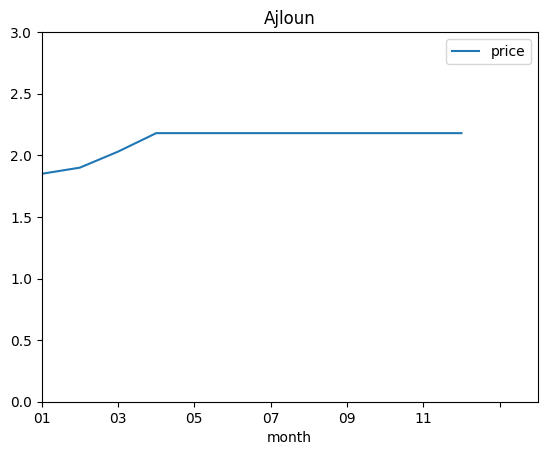

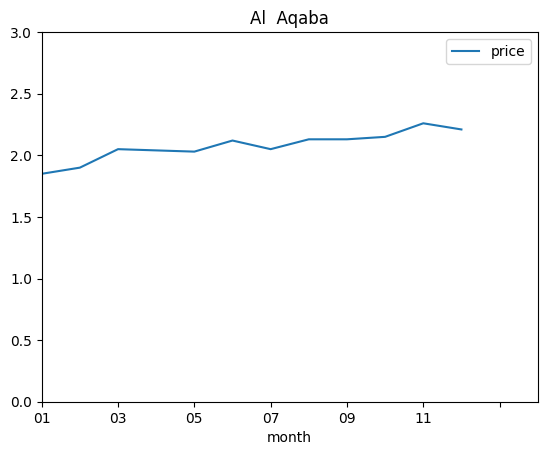

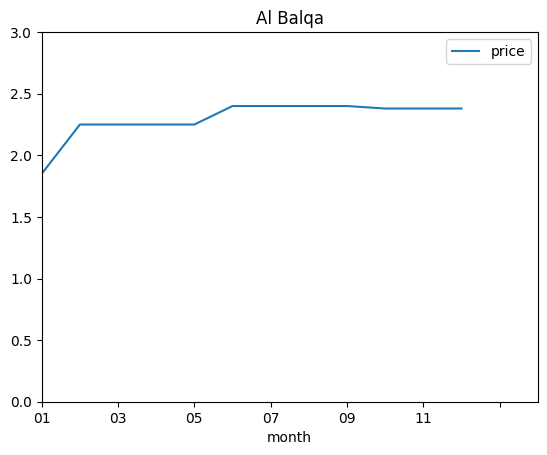

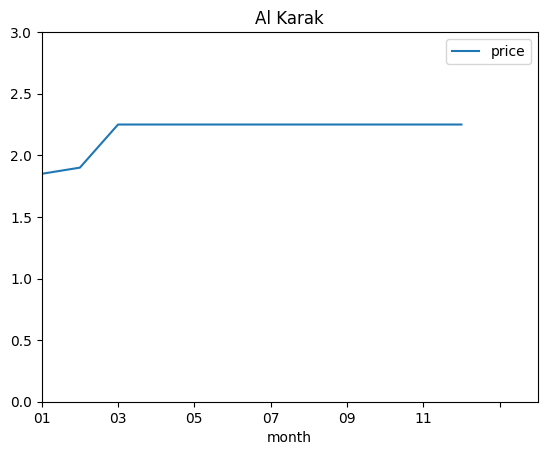

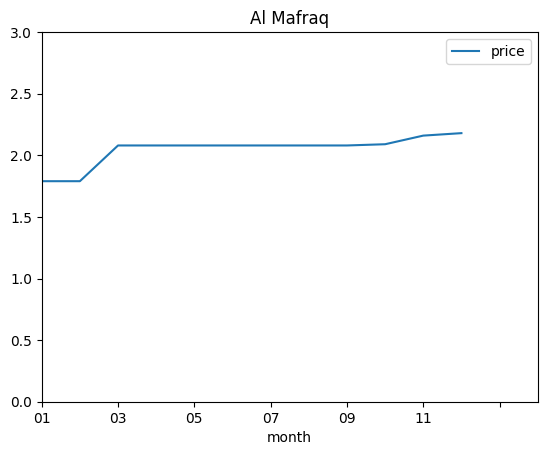

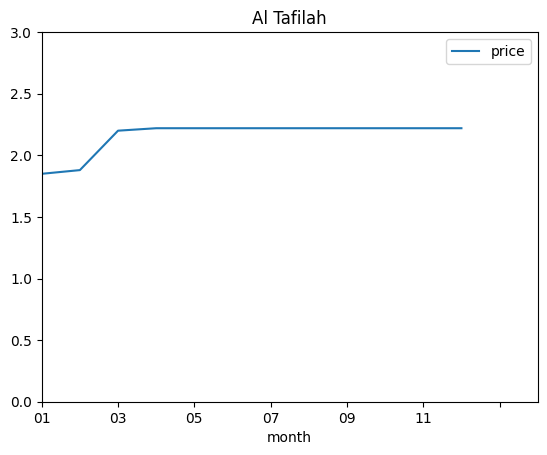

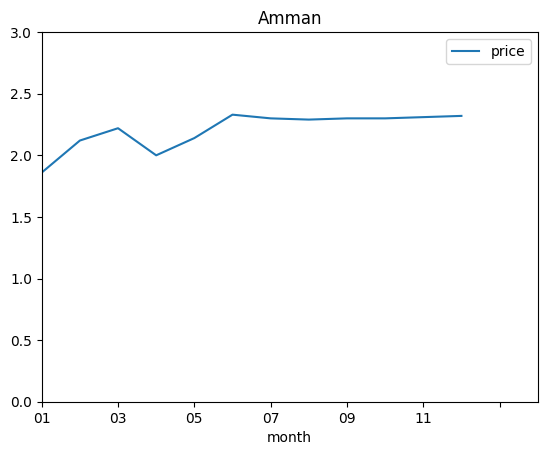

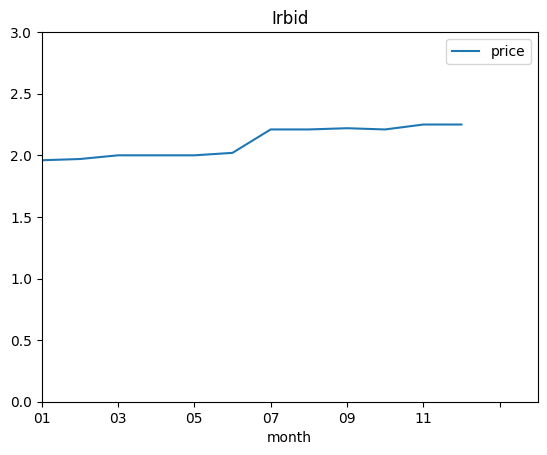

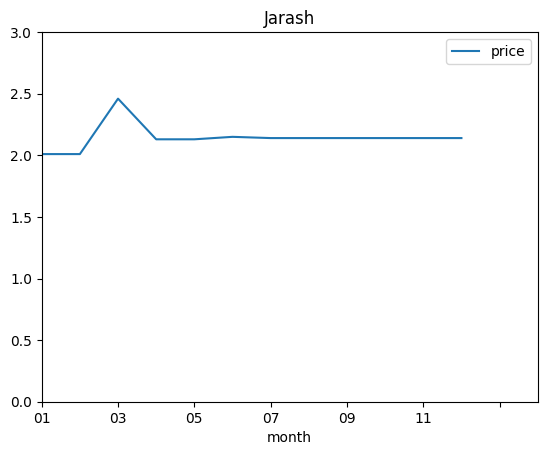

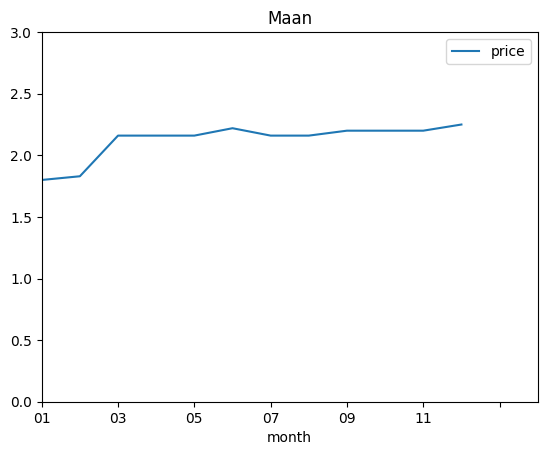

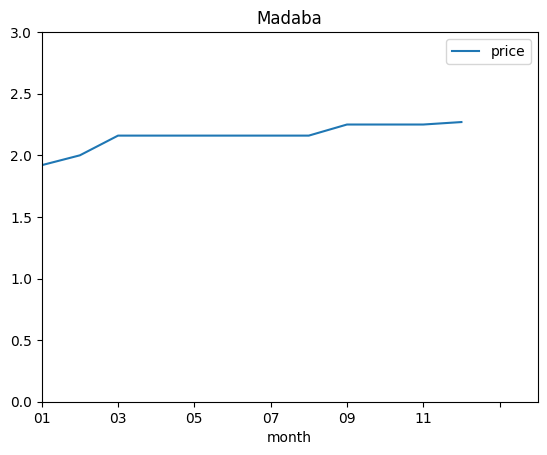

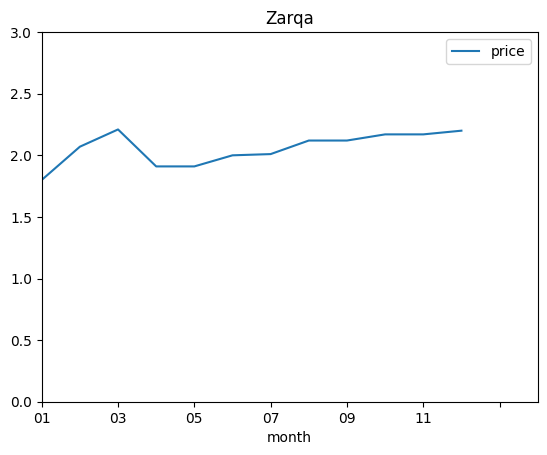

In [188]:
for i in df['admin1'].unique()[1:]:
    df[df['commodity']=='Oil (vegetable)'][df['admin1']==i][df.year=='2021'][['month','price']].plot(x='month',y='price')
    plt.title(i)
    plt.xticks()
    plt.xlim([0,13])
    plt.ylim([0,3])


<AxesSubplot: xlabel='month'>

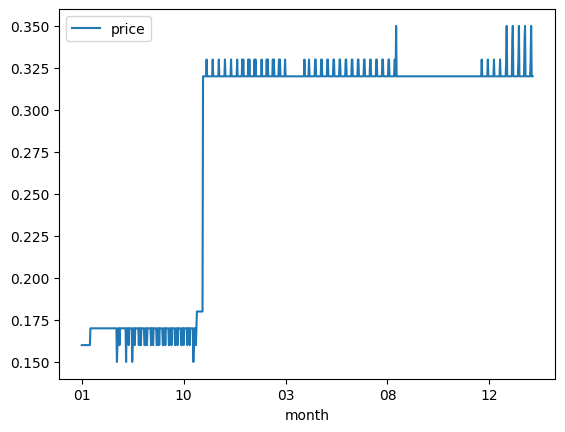

In [189]:
df[df['commodity']=='Bread (pita)'][['month','price']].plot(x='month',y='price')

In [190]:
df[df['commodity']=='Oil (vegetable)'][df['admin1']=='Amman'][df.year=='2022'][['month','price']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17644\3737414055.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['admin1']=='Amman'][df.year=='2022'][['month','price']]


,month,price
26145,01,2.32
26557,02,2.32
26972,03,2.65
27391,04,2.68
27810,05,2.74
28228,06,2.74
28644,07,2.77


In [191]:
avg=df[df['commodity']=='Oil (vegetable)'].groupby('month')['price'].mean()
pd.DataFrame({'month':df['month'].unique(),'avg_price':avg}).head(112)

,month,avg_price
month,,
01,01,1.898205
02,02,1.913974
03,03,2.019615
04,04,2.021667
05,05,2.021410
06,06,2.021236
07,07,2.040000
08,08,1.913636
09,09,1.915152


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17644\1188313081.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Bread (pita)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17644\1188313081.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Bread (pita)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17644\1188313081.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Bread (pita)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17644\1188313081.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Bread (pita)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\AppData\Loca

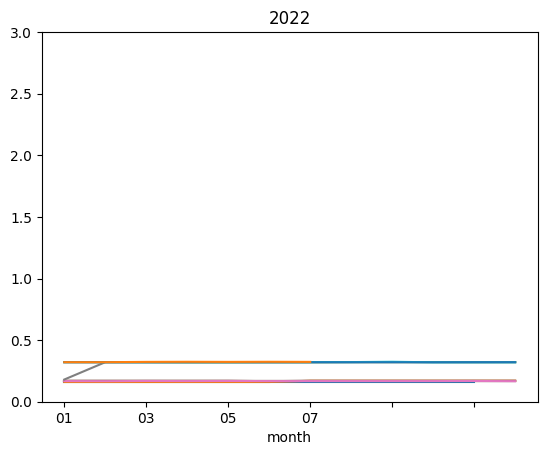

In [192]:
for i in df['year'].unique():
    df[df['commodity']=='Bread (pita)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
    plt.title(i)
    plt.ylim([0,3])
    

In [193]:
df.drop_duplicates(inplace=True)

In [194]:
df.isna().sum()

date            0
admin1       1309
admin2       1309
market          0
latitude     1309
longitude    1309
category        0
commodity       0
unit            0
price           0
usdprice        0
year            0
month           0
dtype: int64

In [195]:
df['admin2'].value_counts()


Qasabet Al_Karak District      2323
Al_Qwaismeh District           2323
Qasabet Irbid District         2319
Qasabet Al-Mafraq District     2309
Qasabet Ajloun District        2307
Qasabet Az_Zarqa District      2307
Qasabet Jerash District        2306
Qasabet As_Salt District       2305
Qasabet Madaba District        2280
Qasabet At_Tafilah District    2268
Ma'an District                 2266
Al_Qwaira District             2208
Name: admin2, dtype: int64

In [196]:
df['admin1'].value_counts()


Al Karak      2323
Amman         2323
Irbid         2319
Al Mafraq     2309
Ajloun        2307
Zarqa         2307
Jarash        2306
Al Balqa      2305
Madaba        2280
Al Tafilah    2268
Maan          2266
Al  Aqaba     2208
Name: admin1, dtype: int64

In [197]:
df['market'].value_counts()


Al Karak            2323
Amman               2323
Irbid               2319
Al Mafraq           2309
Ajloun              2307
Zarqa               2307
Jarash              2306
Al Balqa            2305
Madaba              2280
Al Tafilah          2268
Maan                2266
Al Aqaba            2208
National Average    1309
Name: market, dtype: int64

In [198]:
df['category'].value_counts()

vegetables and fruits    6518
meat, fish and eggs      5090
cereals and tubers       4900
milk and dairy           3243
non-food                 3072
pulses and nuts          2579
oil and fats             1755
miscellaneous food       1673
Name: category, dtype: int64

In [199]:
df['commodity'].value_counts()


Fuel (petrol-gasoline)    948
Fuel (gas)                948
Fuel (kerosene)           948
Bread (pita)              886
Oil (vegetable)           886
Rice (imported)           885
Potatoes                  869
Beans (fava, dry)         869
Tomatoes                  869
Garlic                    869
Cucumbers                 869
Eggs                      869
Chickpeas                 869
Sugar                     869
Meat (lamb)               869
Meat (chicken, whole)     869
Oil (olive)               869
Onions                    868
Meat (beef)               868
Apples (red)              866
Cheese (white, boiled)    865
Milk (pasteurized)        863
Meat (chicken)            835
Bulgur                    819
Lentils                   819
Pasta                     819
Cheese (picon)            819
Bananas                   807
Salt (iodised)            804
Fish (tuna, canned)       780
Spinach                   766
Milk (powder)             696
Wheat flour               622
Oranges (b

In [200]:
df['unit'].value_counts()


KG         17792
L           3803
12.5 KG      948
1.8 L        886
2 KG         869
300 G        815
160 G        815
750 G        804
170 G        780
0.8 KG       696
1.5 KG       622
Name: unit, dtype: int64

In [201]:
df['price'].describe()

count    28830.000000
mean         2.118926
std          2.438656
min          0.150000
25%          0.650000
50%          1.130000
75%          2.240000
max         15.300000
Name: price, dtype: float64